INTRO<br>
The purpose of this project is to take a dataset of NBA players during the regular seasons and perform analysis on it and answer relevant questions with graphical illustrations<br>
The dataset has been taken from kaggle<br>
Some facts are ignored such as players sometimes not being in the same team for all the years 

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("Regular_Season.csv",index_col=False)

CLEAN UP DATA<br>

In [39]:
#Keeping only 2012-2016 regular seasons
df = df[df['year'].isin(['2012-13','2013-14','2014-15','2015-16'])]
#combine stats across the seasons for each player
df = df.groupby("PLAYER",as_index=False).sum()
df=df.drop_duplicates()
#find their latest team
df['TEAM']=df['TEAM'].str[-3:]
#ignore team name change over the years
df.loc[df['TEAM']=='NOH','TEAM']='NOP'
#drop unnecessary columns
df=df.drop(["Season_type","PF","year","PLAYER_ID","TEAM_ID","RANK"],axis=1)
#clean up null values
#print(df2.isna().sum()) , no columns with null values 

ADDITIONAL FEATURES<br>
Adding a PointsPerGame(PPG) and FieldGoalAttemptPerGame(FPG) and Efficiency and ScoringEfficiency(SE) column<br>

In [40]:
# Points Per Game = Total Points/Total Games Played
df['PPG']=df['PTS']/df['GP']
#Field Goal Attempt Per Game = Total Field Goal Attempts/Total Games Played
df['FPG']=df['FGA']/df['GP']
# Efficiency = sum of positive contributions - sum of missed attempts and turnovers
df['Efficiency'] = (df['PTS'] + df['REB'] + df['AST'] + df['STL'] + df['BLK']) - (df['FGA'] - df['FGM'] + df['FTA'] - df['FTM'] + df['TOV'])
#Scoring Efficiency = Total points scored/Total Number of Field Goal Attempts
df['SE']=df['PTS']/df['FGA']

CHARTS AND GRAPHS<br>

<Axes: xlabel='TEAM', ylabel='Count'>

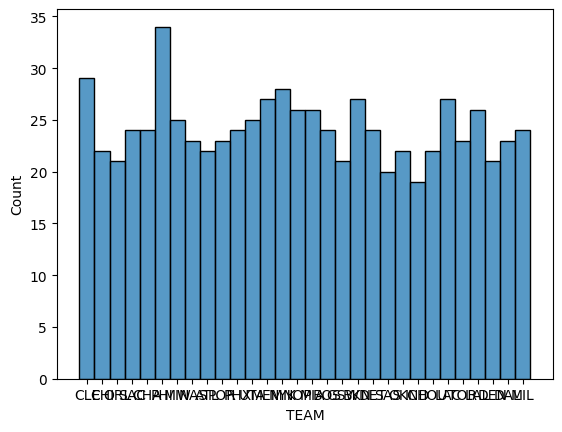

In [41]:
#visualizing the spread of players across the teams
sns.histplot(df['TEAM']) 

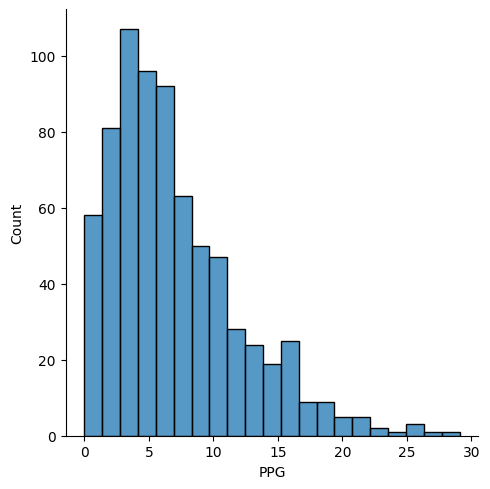

In [42]:
#visualizing the distribution of PPG of various players
sns.displot(df['PPG']) 

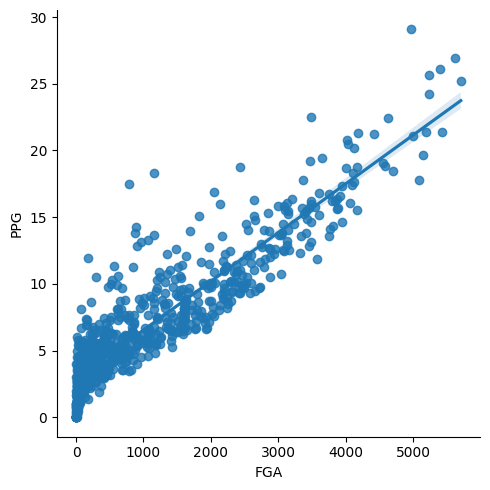

In [43]:
#Visualizing the increase in PPG as FGA increases, but some outliers high PPG with low FGA(efficient)
sns.lmplot(data=df,x='FGA',y='PPG') 

ANSWERS I WANTED TO FIND FROM THE DATA

In [44]:
print('1. Which players scored the most while being highly efficient in the 2012-16 regular seasons')
df1=df.copy()
df1=df1.sort_values(['PPG','SE'],ascending=False).query("GP>50")
df1[['PLAYER','PPG','SE']].head(10)

1. Which players scored the most while being highly efficient in the 2012-16 regular seasons


,PLAYER,PPG,SE
409,Kevin Durant,29.072797,1.527068
294,James Harden,26.964968,1.504175
448,LeBron James,26.134228,1.441688
91,Carmelo Anthony,25.667969,1.252812
644,Stephen Curry,25.187302,1.389492
605,Russell Westbrook,24.250909,1.272467
422,Kobe Bryant,22.481081,1.190326
166,DeMarcus Cousins,22.455556,1.310919
436,LaMarcus Aldridge,21.371528,1.183426
139,Damian Lillard,21.358255,1.263546


In [45]:
print('2. Which teams relied on their top player the most for scoring')
df2_1=df.copy()
df2_2=df.copy()
df2_1=df2_1[['TEAM','PLAYER','PTS']]
df2_1=df2_1.groupby('TEAM')['PTS'].sum().reset_index().rename(columns={'PTS':'TEAM_PTS'})
df2_2=df2_2.sort_values(['TEAM','PTS'],ascending=[True,False])
df2_2=df2_2.groupby('TEAM').head(1) #The top player
df2_3=df2_2.merge(df2_1,on='TEAM')
df2_3['top1_pct']=df2_3['PTS']/df2_3['TEAM_PTS']
df2_3=df2_3[['TEAM','PLAYER','PTS','TEAM_PTS','top1_pct']].sort_values('top1_pct',ascending=False)
df2_3

2. Which teams relied on their top player the most for scoring


,TEAM,PLAYER,PTS,TEAM_PTS,top1_pct
10,HOU,James Harden,8467,36607,0.231295
24,POR,Damian Lillard,6856,30601,0.224045
9,GSW,Stephen Curry,7934,35570,0.223053
28,UTA,Gordon Hayward,5306,24735,0.214514
19,NYK,Carmelo Anthony,6571,32624,0.201416
20,OKC,Kevin Durant,7588,38876,0.195185
5,CLE,LeBron James,7788,41653,0.186973
25,SAC,DeMarcus Cousins,6063,33145,0.182924
2,BOS,Isaiah Thomas,5489,30017,0.182863
27,TOR,DeMar DeRozan,6310,34667,0.182017


In [46]:
print('3. Which players had the highest overall efficiency')
df3=df.copy()
df3=df3[['PLAYER','Efficiency','GP']].sort_values('Efficiency',ascending=False).query('GP>50')
df3

3. Which players had the highest overall efficiency


,PLAYER,Efficiency,GP
448,LeBron James,8541,298
644,Stephen Curry,8193,315
294,James Harden,8130,314
409,Kevin Durant,7878,261
111,Chris Paul,7237,288
...,...,...,...
301,James Young,124,60
313,Jason Collins,120,60
343,Joe Harris,111,56
697,Tyshawn Taylor,101,61


4. Is there a correlation between assists and points
The lmplot of PTS vs AST shows positive correlation, indicating that players who assist more also tend to score more, though several outliers suggest different play styles,some players focus more on scoring, while others are playmakers


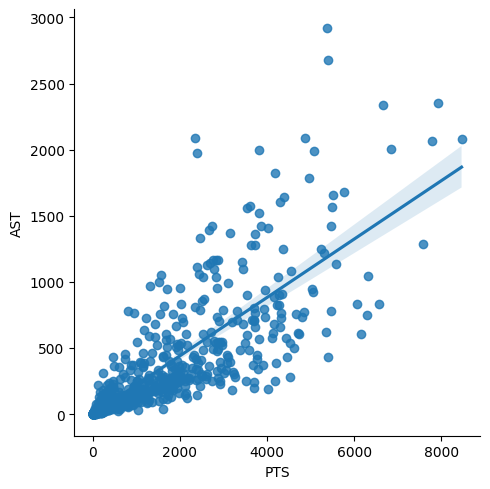

In [47]:
print('4. Is there a correlation between assists and points')
sns.lmplot(data=df,x='PTS',y='AST')
print('The lmplot of PTS vs AST shows positive correlation, indicating that players who assist more also tend to score more, though several outliers suggest different play styles,some players focus more on scoring, while others are playmakers')

In [48]:
print('5. Which team has the best scoring efficiency on average')
df5=df.copy()
df5=df5[['TEAM','SE']].groupby('TEAM')['SE'].mean().sort_values(ascending=False).reset_index()
df5


5. Which team has the best scoring efficiency on average


,TEAM,SE
0,GSW,1.216639
1,SAS,1.205212
2,IND,1.194856
3,HOU,1.181142
4,MIN,1.174242
5,ATL,1.170823
6,MIA,1.166359
7,TOR,1.157741
8,DAL,1.147659
9,LAC,1.144967


<Axes: xlabel='SE', ylabel='TEAM'>

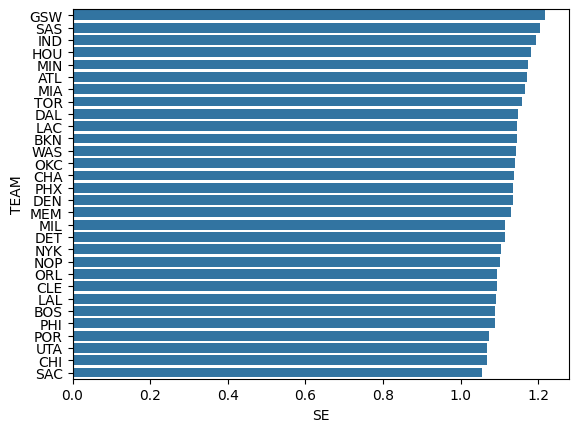

In [32]:
sns.barplot(data=df5, x='SE', y='TEAM')